Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 2) 0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 128, 128, 16) 304         input_4[0][0]                    
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 128, 128, 16) 0           conv2d_39[0][0]                  
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 128, 128, 16) 2320        dropout_18[0][0]                 
____________________________________________________________________________________________

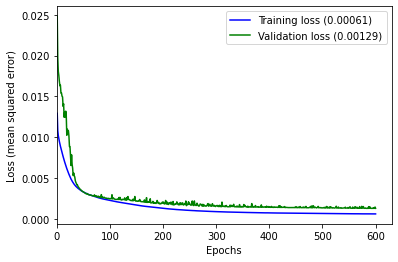

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 26 11:00:25 2020

@author: shossein
"""
#%tensorflow_version 1.x
import random
import numpy as np
seed = 6
np.random.seed = seed
random.seed(seed)

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# from tensorflow import set_random_seed
#tf.random.set_seed(seed)

# from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

import pickle

data_path = '/content/'
my_drive = '/content/drive/MyDrive/Colab Notebooks/'

#load data back in
pickle_in = open(my_drive+'X_train_final_01', 'rb')
X_train = pickle.load(pickle_in)

pickle_in = open(my_drive+'Y_train_final_01', 'rb')
Y_train = pickle.load(pickle_in)

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 2

# build the Unet model
inputs = tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS ))
s = inputs#tf.keras.layers.Lambda(lambda x: x/255)(inputs)

# contraction path
c1=tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1=tf.keras.layers.Dropout(0.1)(c1)
c1=tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1=tf.keras.layers.MaxPooling2D( (2,2)) (c1)

c2=tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2=tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2=tf.keras.layers.MaxPooling2D( (2,2)) (c2)

c3=tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3=tf.keras.layers.Dropout(0.1)(c3)
c3=tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3=tf.keras.layers.MaxPooling2D( (2,2)) (c3)

c4=tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4=tf.keras.layers.Dropout(0.1)(c4)
c4=tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4=tf.keras.layers.MaxPooling2D( (2,2)) (c4)

c5=tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5=tf.keras.layers.Dropout(0.1)(c5)
c5=tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Expansion path

u6=tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6=tf.keras.layers.concatenate([u6,c4])
c6=tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6) 
c6=tf.keras.layers.Dropout(0.2)(c6)
c6=tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6) 

u7=tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7=tf.keras.layers.concatenate([u7,c3])
c7=tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7) 
c7=tf.keras.layers.Dropout(0.2)(c7)
c7=tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7) 

u8=tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8=tf.keras.layers.concatenate([u8,c2])
c8=tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8) 
c8=tf.keras.layers.Dropout(0.1)(c8)
c8=tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8) 

u9=tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9=tf.keras.layers.concatenate([u9,c1], axis=3)
c9=tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9) 
c9=tf.keras.layers.Dropout(0.1)(c9)
c9=tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9) 

c10 = tf.keras.layers.Conv2D(1,(1,1), activation='relu')(c9)# act function changed from Sigmoid

#c11 = tf.keras.layers.Dense(512, activation='relu')(c10)
#c12 = tf.keras.layers.Dense(256, activation='relu')(c11)
#c13 = tf.keras.layers.Dense(128, activation='relu')(c12)
#c14 = tf.keras.layers.Dense(64, activation='relu')(c13)
#c15 = tf.keras.layers.Dense(32, activation='relu')(c14)
#c16 = tf.keras.layers.Dense(16, activation='relu')(c15)

outputs = c10      #tf.keras.layers.Dense(1)(c10)

learning_rate=0.1
model= tf.keras.Model(inputs=[inputs], outputs=[outputs])
opt = tf.keras.optimizers.Adadelta(learning_rate=learning_rate)
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae']) # accuracy was rmoved since it is a regression 
model.summary()

#######################3
# Model checkpoint
checkpointer= tf.keras.callbacks.ModelCheckpoint('Model_RiverDepth.h5', verbose=10, save_best_only=True)
callbacks= [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir="data_path")]
    
batch_size = 128 
epochs = 600
# results = model.fit(X_train,Y_train, validation_split = 0.2, batch_size = batch_size, epochs = epochs, callbacks=callbacks)# with call back
results=model.fit(X_train,Y_train, validation_split = 0.2, batch_size = batch_size, epochs = epochs ) # without call back

# model.save('Unet_HYD_Model{}'.format(X_train.shape))
model.save(my_drive+'Pure_Unet_Colab_NOANN_main')# 
#model.save(my_drive+'Pure_Unet_Colab_NOANN_relu.h5')# 


#----------------------------------------- plotting the accuracy history
from keras.callbacks import History 
history = History()
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    print(loss_list,val_loss_list)
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.xlim(xmin=0)
    # plt.ylim(ymin=0.065, ymax=0.1)
    # plt.title('Loss-n={}, batch={}, lr={}'.format(X_train.shape, batch_size, learning_rate))
    plt.xlabel('Epochs')
    plt.ylabel('Loss (mean squared error)')
    plt.legend()
    
#import above function and pass the parameter used while training    
plot_history(results)    
plt.savefig(my_drive+'Pure_Unet_Colab_NOANN_main', dpi = 300)
# plt.savefig('n={}'.format(X_train.shape))
















